1. Import Library & Import Data

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn')   # 'default', 'seaborn'

# Import data จาก csv


sp500 = pd.read_csv(r'https://raw.githubusercontent.com/jaythitiw/SP500_Project/main/SP500.csv', encoding='utf-8')
GOLD = pd.read_csv(r'https://raw.githubusercontent.com/jaythitiw/SP500_Project/main/GOLD.csv', encoding='utf-8')
NDQ = pd.read_csv(r'https://raw.githubusercontent.com/jaythitiw/SP500_Project/main/NASDAQ.csv', encoding='utf-8')
PPI = pd.read_csv(r'https://raw.githubusercontent.com/jaythitiw/SP500_Project/main/PPI.csv', encoding='utf-8')
CPI = pd.read_csv(r'https://raw.githubusercontent.com/jaythitiw/SP500_Project/main/CPI.csv', encoding='utf-8')
GDP = pd.read_csv(r'https://raw.githubusercontent.com/jaythitiw/SP500_Project/main/GDP.csv', encoding='utf-8')
Bondyield10Y =  pd.read_csv(r'https://raw.githubusercontent.com/jaythitiw/SP500_Project/main/US10YY-Historical%20data.csv', encoding='utf-8')
FEDFUND = pd.read_csv(r'https://raw.githubusercontent.com/jaythitiw/SP500_Project/main/FEDFUNDS.csv', encoding='utf-8')
SP500yield = pd.read_csv(r'https://raw.githubusercontent.com/jaythitiw/SP500_Project/main/SP500Yield.csv', encoding='utf-8')



url = 'https://github.com/jaythitiw/SP500_Project/raw/main/SP500Holding.csv'
df = pd.read_csv(url)


sp500_url = 'https://github.com/jaythitiw/SP500_Project/raw/main/SP500.csv'
set50_url = 'https://github.com/jaythitiw/SP500_Project/raw/main/SET50.csv'

sp500_close = pd.read_csv(sp500_url)
set50_close = pd.read_csv(set50_url)




In [75]:
print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"Matplotlib {mpl.__version__}" )


Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Pandas 1.5.3
NumPy 1.21.5
Matplotlib 3.5.2


2. Cleansing Data

In [76]:
#Convert Data Type and Change Column name
sp500["Date"] = pd.to_datetime(sp500["Date"])
GOLD["DATE"] = pd.to_datetime(GOLD["DATE"], dayfirst=True)
NDQ["NDQ_DATE"] = pd.to_datetime(NDQ["DATE"], dayfirst=True)
PPI["PPI_DATE"] = pd.to_datetime(PPI["DATE"], dayfirst=True)
CPI["CPI_DATE"] = pd.to_datetime(CPI["DATE"], dayfirst=True)
GDP["GDP_DATE"] = pd.to_datetime(GDP["DATE"], dayfirst=True)
Bondyield10Y["10Y_DATE"] = pd.to_datetime(Bondyield10Y["DATE"], dayfirst=True)
FEDFUND['FED_DATE'] = pd.to_datetime(FEDFUND["DATE"], dayfirst=True)
SP500yield['SP500Yield_DATE'] = pd.to_datetime(SP500yield["DATE"], dayfirst=True)
sp500["Close"] = sp500["Close*"].replace(',','',regex=True)
sp500["sp500_Close"] = sp500["Close"].astype(float)
sp500.rename({'Close*': 'Close'}, axis=1, inplace=True)
sp500["High"] = sp500["High"].replace(',','',regex=True)
sp500["High"] = sp500["High"].astype(float)
sp500["Open"] = sp500["Open"].replace(',','',regex=True)
sp500["Open"] = sp500["Open"].astype(float)
sp500["Low"] = sp500["Low"].replace(',','',regex=True)
sp500["Low"] = sp500["Low"].astype(float)
sp500["Volume"] = sp500["Volume"].replace(',','',regex=True)
sp500["Volume"] = sp500["Volume"].astype(float)
NDQ["Volume"] = sp500["Volume"].astype(float)
SP500yield.rename({'Dividend Yield': 'SP500_Yield'}, axis=1, inplace=True)
SP500yield = SP500yield[(SP500yield['SP500Yield_DATE'].dt.year >= 2018) & (SP500yield['SP500Yield_DATE'].dt.year < 2023)]

df.rename(columns= {'Market Capitalization' : 'Market Cap'}, inplace = True)
g=df.groupby('Sector')


# df.sort_values('Market Cap', ascending = False )



3. Descriptive Statistics

S&P 500 มี 19 sectors


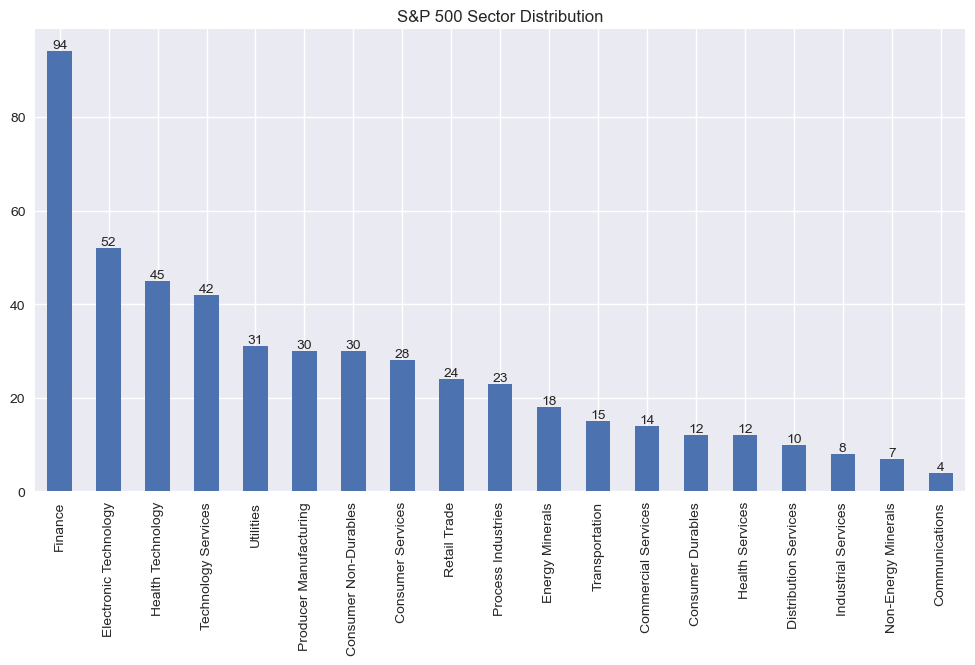

In [77]:
num_sectors = df['Sector'].nunique()
print(f"S&P 500 มี {num_sectors} sectors")

sector_count = df['Sector'].value_counts()
ax = sector_count.plot.bar(x='Sector', y='Count', figsize=(12,6), title='S&P 500 Sector Distribution')

for i, val in enumerate(sector_count.values):
    plt.text(i, val, f"{val:,}", ha='center', va='bottom')

plt.show()

In [14]:
df['Market Cap'] = df['Market Cap'].astype(str)
df['Market Cap'] = df['Market Cap'].str.replace(r'[^\d.]+', '')
df['Market Cap'] = df['Market Cap'].astype(float)
# หา Top 10 ของ S&P 500 ที่มี Market Capitalization สูงสุด
top10_df = df.sort_values('Market Cap', ascending=False).head(10)

# คำนวณเปอร์เซ็นต์ Market Capitalization ของ Top 10 ต่อ Index ทั้งหมด
total_market_cap = df['Market Cap'].sum()
top10_market_cap = top10_df['Market Cap'].sum()
top10_percentage = top10_market_cap / total_market_cap * 100

# print(f"Top 10 market capitalization: {top10_market_cap:.2f} Billion USD ({top10_percentage:.2f}% of Total Index Market Cap)\n")
# print("Top 10 Companies:")
# print(top10_df[[ 'Ticker', 'Company', 'Sector', 'Market Cap' ]])

C:\Users\JayNB\AppData\Local\Temp\ipykernel_26284\1646806180.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Market Cap'] = df['Market Cap'].str.replace(r'[^\d.]+', '')


In [15]:
top10 = df.sort_values('Market Cap', ascending=False).head(10)

print(f"Top 10 market capitalization: {top10_market_cap:.2f} Billion USD ({top10_percentage:.2f}% of Total Index Market Cap)\n")

print("Top 10 Companies:")
top10.style.format({'Market Cap': '${:,.2f}',}).bar(subset=['Market Cap'], color='#d65f5f').set_properties(**{'background-color': 'white',
    'color': 'black',
    'width': '100px',
    'font-size': '14px',
    'text-align': 'center',})

Top 10 market capitalization: 9014356438478.00 Billion USD (25.45% of Total Index Market Cap)

Top 10 Companies:


,Ticker,Company,Sector,Market Cap
0,AAPL,Apple Inc.,Electronic Technology,"$2,122,302,102,525.00"
1,MSFT,Microsoft Corporation,Technology Services,"$1,777,966,348,754.00"
2,GOOGL,Alphabet Inc.,Technology Services,"$1,184,242,673,454.00"
3,AMZN,"Amazon.com, Inc.",Retail Trade,"$971,911,570,617.00"
4,BRK.B,Berkshire Hathaway Inc. New,Finance,"$703,424,304,407.00"
5,XOM,Exxon Mobil Corporation,Energy Minerals,"$466,273,190,232.00"
6,UNH,UnitedHealth Group Incorporated,Health Services,"$463,128,811,145.00"
7,V,Visa Inc.,Commercial Services,"$461,034,533,556.00"
8,JNJ,Johnson & Johnson,Health Technology,"$454,920,111,328.00"
9,JPM,JP Morgan Chase & Co.,Finance,"$409,152,792,460.00"


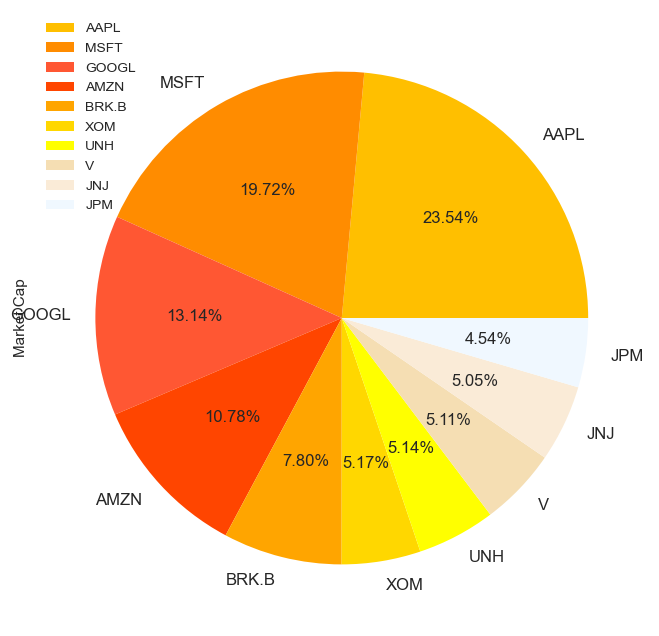

In [16]:

top10 = df.sort_values('Market Cap', ascending=False).head(10)
x =top10.plot.pie(y='Market Cap', figsize=(8, 8), autopct='%.2f%%', labels=top10['Ticker'], fontsize=12, colors=['#ffbf00', '#ff8c00', '#ff5733', '#ff4500', '#ffa500', '#ffd700', '#ffff00', '#f5deb3', '#faebd7', '#f0f8ff'])
x.legend( loc='upper left')
plt.show()

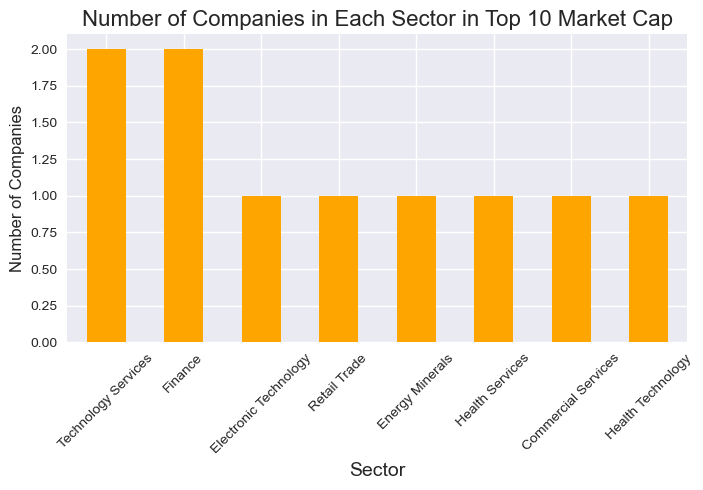

In [17]:
# หาจำนวน Sector ที่มีใน Top 10
top10_sectors = df.loc[df['Ticker'].isin(top10['Ticker']), 'Sector'].value_counts()

# วาดกราฟ Bar Chart
top10_sectors.plot.bar(figsize=(8,4), rot=45, color='Orange')
plt.title('Number of Companies in Each Sector in Top 10 Market Cap', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Number of Companies', fontsize=12)
plt.show()

In [18]:
df['Market Cap'] = df['Market Cap'].astype(str)
df['Market Cap'] = df['Market Cap'].str.replace(r'[^\d.]+', '')
df['Market Cap'] = df['Market Cap'].astype(float)
#Sort Sector เพื่อหา Market Cap ของแต่ละ Sector
market_cap_by_sector = df.groupby('Sector')['Market Cap'].sum().sort_values(ascending=False)

print(market_cap_by_sector)

Sector
Technology Services       5.459108e+12
Electronic Technology     5.303809e+12
Finance                   4.975459e+12
Health Technology         3.978491e+12
Retail Trade              2.761219e+12
Consumer Non-Durables     2.165309e+12
Energy Minerals           1.566287e+12
Consumer Services         1.299597e+12
Commercial Services       1.286465e+12
Producer Manufacturing    1.170999e+12
Utilities                 1.065264e+12
Health Services           9.647910e+11
Process Industries        7.677942e+11
Transportation            6.695485e+11
Consumer Durables         6.463933e+11
Communications            5.066895e+11
Industrial Services       3.271034e+11
Distribution Services     2.879341e+11
Non-Energy Minerals       2.196015e+11
Name: Market Cap, dtype: float64


C:\Users\JayNB\AppData\Local\Temp\ipykernel_26284\2418646797.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Market Cap'] = df['Market Cap'].str.replace(r'[^\d.]+', '')


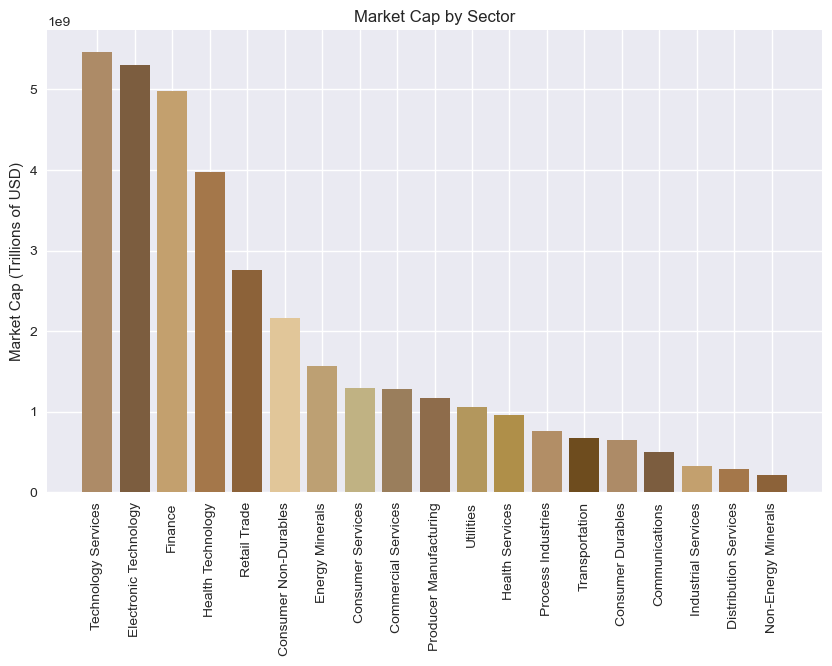

In [19]:
#วาดกราฟ Market Cap ของแต่ละ Sector

# Define the colors for each sector
colors = ['#ad8b67', '#7c5d3f', '#c3a06e', '#a4774a', '#8c6239', '#e1c699', '#bda073', '#c0b283', '#9a7e5c', '#8e6c4b', '#b3975d', '#af8f49', '#b28e66', '#6e4c1e']

market_cap_by_sector = df.groupby('Sector')['Market Cap'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(market_cap_by_sector.index, market_cap_by_sector.values/1000, color=colors)
plt.xticks(rotation=90)
plt.ylabel('Market Cap (Trillions of USD)')
plt.title('Market Cap by Sector')

plt.show()




Text(0, 0.5, '')

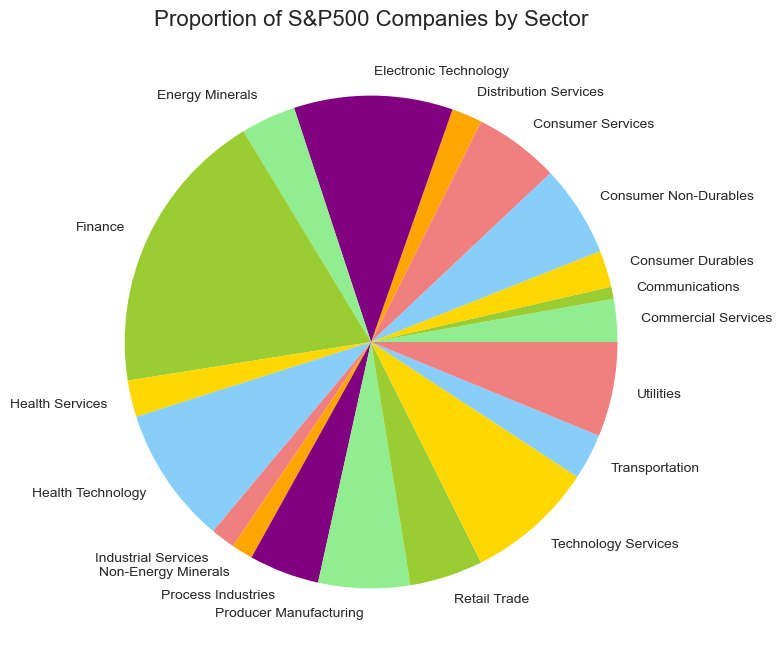

In [20]:
sector_portion = df.groupby('Sector')['Ticker'].count() / len(df) * 100
# Set colors
colors = ['lightgreen', 'yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'orange', 'purple']

# Create pie chart
sector_portion.plot.pie(colors=colors, figsize=(8, 8))

# Set title and y-axis label
plt.title('Proportion of S&P500 Companies by Sector', fontsize=16)
plt.ylabel('')

Text(0.5, 1.0, 'Proportion of S&P500 Companies by Top 5 Sectors')

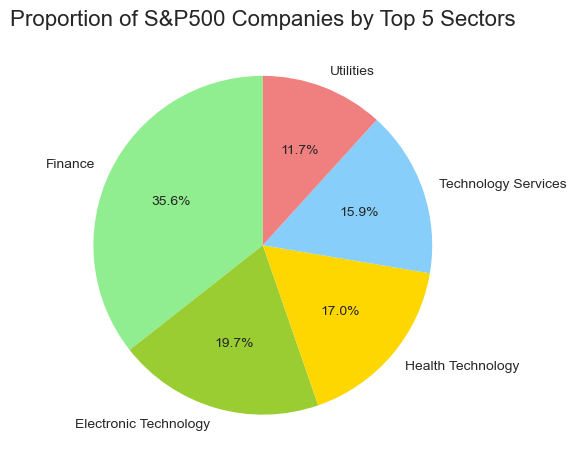

In [21]:
sector_portion = (df.groupby('Sector')['Ticker'].count() / len(df) * 100).round(2)
#เรียงลำดับสัดส่วนจาก มากไปน้อย
sector_portion_sorted = sector_portion.sort_values(ascending=False)
# Select top 5 sectors with highest portion
top_5_sectors = sector_portion_sorted.head(5)

# Create pie chart with percentage labels
plt.pie(top_5_sectors, colors=colors, labels=top_5_sectors.index, autopct='%1.1f%%', startangle=90)

# Set title
plt.title('Proportion of S&P500 Companies by Top 5 Sectors', fontsize=16)


Text(0, 0.5, 'S&P500 INDEX')

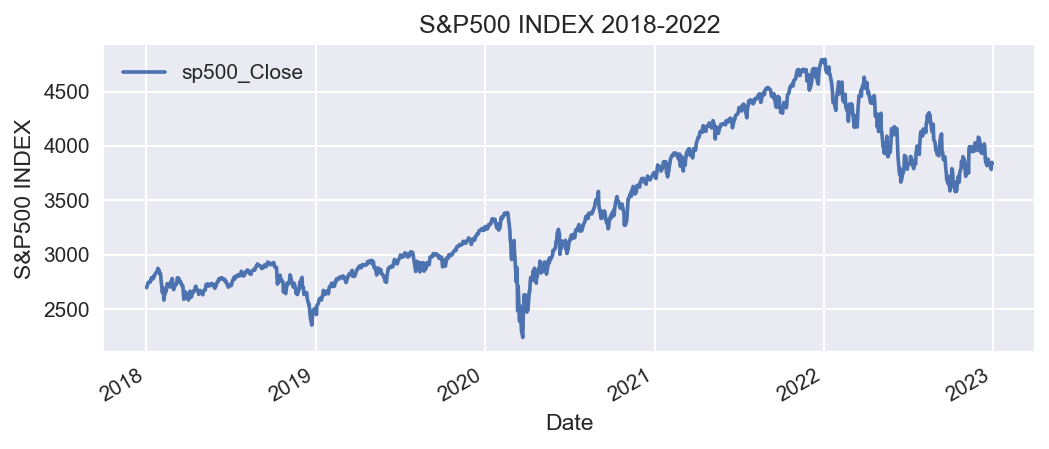

In [22]:
#Plot กราฟ S&P500 ตามช่วงเวลา
plt.figure(figsize=(8,3), dpi=150)
sp500.plot( kind='line',        
             x='Date',       
             y=['sp500_Close'],
             linestyle='solid', 
             ax=plt.gca()  
           );plt.title('S&P500 INDEX 2018-2022')
plt.ylabel('S&P500 INDEX')



In [23]:
#INNER JOIN ข้อมูลของ S&P500 กับ GOLD และ NASDAQ join ด้วย date
SP500_GOLD = pd.merge( sp500, GOLD, left_on='Date', right_on='DATE', how='inner' )
SP500_NDQ = pd.merge( sp500, NDQ, left_on='Date', right_on='NDQ_DATE', how='inner' )

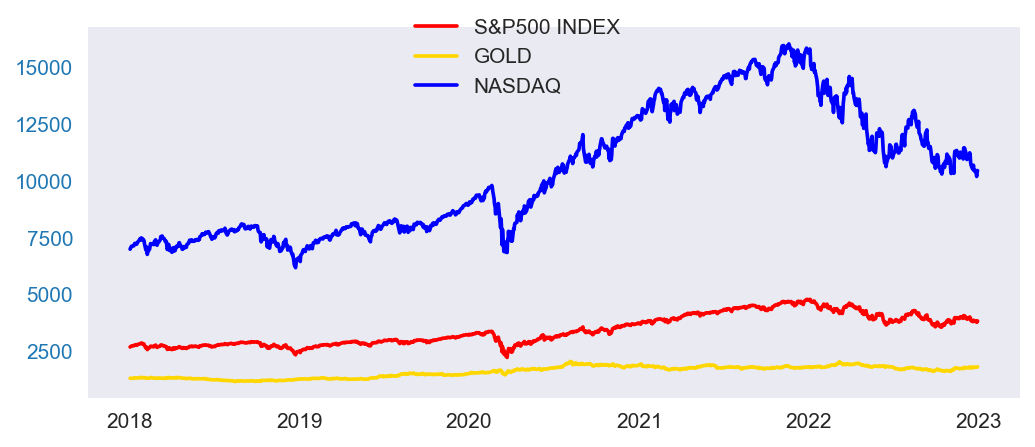

In [24]:
## Plot ความสัมพันธ์ระหว่าง S&P500 กับ GOLD และ NASDAQ
fig, ax1 = plt.subplots(figsize=(7,3),dpi=150)

ax1.grid(False)
color = 'tab:blue'
plt.plot( SP500_NDQ['Date'], SP500_NDQ['sp500_Close'], linestyle='solid' ,color='red',label = "S&P500 INDEX")
plt.plot( SP500_GOLD['Date'], SP500_GOLD['CLOSE'], linestyle='solid',color='gold' ,label = "GOLD")
ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# ax2.grid(False)
color = 'tab:blue'
plt.plot( SP500_NDQ['Date'], SP500_NDQ['CLOSE'], linestyle='solid' ,color='blue',label = "NASDAQ")
# plt.plot( SP500_DJI['Date'], SP500_DJI['CLOSE'], linestyle='solid' ,color='orange')
# ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='upper center')
plt.show()

In [25]:
# หา Correlation ระหว่าง S&P500 กับ GOLD และ NASDAQ
Corr_NDQ = SP500_NDQ['sp500_Close'].corr(SP500_NDQ['CLOSE']) ### Corelation between S&P500 & NASDAQ
SP_GOLD_corr = SP500_GOLD['sp500_Close'].corr(SP500_GOLD['CLOSE']) ### Corelation between S&P500 & NASDAQ
print(f'Correlation between S&P500 and NASDAQ is {Corr_NDQ.round(2)}' )
print(f'Correlation between S&P500 and GOLD is {SP_GOLD_corr.round(2)}' )

Correlation between S&P500 and NASDAQ is 0.97
Correlation between S&P500 and GOLD is 0.78


In [26]:
### หา Growth Rate ของ S&P 500 สำหรับ 5 ปี
sp500_open_5year = sp500.loc[[sp500['Date'].idxmin()]]
sp500_open_5year['Year'] = sp500_open_5year['Date'].dt.year
sp500_open_5year[['Year','Open']].reset_index(drop=True)
sp500_close_5year = sp500.loc[[sp500['Date'].idxmax()]]
sp500_close_5year['Year'] = sp500_close_5year['Date'].dt.year
sp500_open_5year = sp500_open_5year[['Year','Open']].reset_index(drop=True)
sp500_open_5year['type'] = "S&P500"
sp500_open_5year
sp500_close_5year['type'] = "S&P500"
SP500_5Y = pd.merge( sp500_open_5year, sp500_close_5year, left_on='type', right_on='type', how='inner' )
SP500_5Y['Change'] = SP500_5Y['sp500_Close'] - SP500_5Y['Open_x']
SP500_5Y['%change'] = SP500_5Y['Change']*100/SP500_5Y['Open_x']
SP500_5Y =SP500_5Y[['type','Change','%change']]
SP500_5Y


,type,Change,%change
0,S&P500,1155.77,43.065808


In [27]:
### หา Growth Rate ของ GOLD สำหรับ 5 ปี
GOLD = GOLD[(GOLD['DATE'].dt.year >= 2018) ]
GOLD_open_5year = GOLD.loc[[GOLD['DATE'].idxmin()]]
GOLD_open_5year['Year'] = GOLD_open_5year['DATE'].dt.year
GOLD_open_5year[['Year','OPEN']].reset_index(drop=True)
GOLD_close_5year = GOLD.loc[[GOLD['DATE'].idxmax()]]
GOLD_close_5year['Year'] = GOLD_close_5year['DATE'].dt.year
GOLD_close_5year = GOLD_close_5year[['Year','CLOSE']].reset_index(drop=True)
GOLD_open_5year['type'] = "GOLD"
GOLD_close_5year
GOLD_close_5year['type'] = "GOLD"
GOLD_5Y = pd.merge( GOLD_open_5year, GOLD_close_5year, left_on='type', right_on='type', how='inner' )
GOLD_5Y['Change'] = GOLD_5Y['CLOSE_y'] - GOLD_5Y['OPEN']
GOLD_5Y['%change'] = GOLD_5Y['Change']*100/GOLD_5Y['OPEN']
GOLD_5Y =GOLD_5Y[['type','Change','%change']]
GOLD_5Y

,type,Change,%change
0,GOLD,623.95,47.89925


In [28]:
### หา Growth Rate ของ NASDAQ สำหรับ 5 ปี
NDQ = NDQ[(NDQ['NDQ_DATE'].dt.year >= 2018) ]
NDQ_open_5year = NDQ.loc[[NDQ['NDQ_DATE'].idxmin()]]
NDQ_open_5year['Year'] = NDQ_open_5year['NDQ_DATE'].dt.year
NDQ_open_5year[['Year','OPEN']].reset_index(drop=True)
NDQ_close_5year = NDQ.loc[[NDQ['NDQ_DATE'].idxmax()]]
NDQ_close_5year['Year'] = NDQ_close_5year['NDQ_DATE'].dt.year
NDQ_close_5year = NDQ_close_5year[['Year','CLOSE']].reset_index(drop=True)
NDQ_open_5year['type'] = "NDQ"
NDQ_close_5year
NDQ_close_5year['type'] = "NDQ"
NDQ_5Y = pd.merge( NDQ_open_5year, NDQ_close_5year, left_on='type', right_on='type', how='inner' )
NDQ_5Y['Change'] = NDQ_5Y['CLOSE_y'] - NDQ_5Y['OPEN']
NDQ_5Y['%change'] = NDQ_5Y['Change']*100/NDQ_5Y['OPEN']
NDQ_5Y =NDQ_5Y[['type','Change','%change']]
NDQ_5Y

,type,Change,%change
0,NDQ,4574.76,65.941061


In [68]:
### เปรียบเทียบ Growth Rate ของ S&P500 เมื่อเทียบกับ  GOLD และ NASDAQ
union_df= pd.concat([SP500_5Y, GOLD_5Y,NDQ_5Y],ignore_index=True).round(2)
union_df

,type,Change,%change
0,S&P500,1155.77,43.07
1,GOLD,623.95,47.90
2,NDQ,4574.76,65.94


In [30]:
#### หา index ของ open วันแรก และ  close วันสุดท้ายของปี สำหรับ S&P500
grouped = sp500.groupby(pd.Grouper(key='Date', freq='Y'))
min_indices = grouped['Date'].idxmin()
sp500_open_year = sp500.loc[min_indices]
sp500_open_year = sp500_open_year[ ['Date', 'Open'] ].reset_index(drop=True)
sp500_open_year['Year'] = sp500_open_year['Date'].dt.year
max_indices = grouped['Date'].idxmax()
sp500_close_year = sp500.loc[max_indices]
sp500_close_year = sp500_close_year[ ['Date', 'sp500_Close'] ].reset_index(drop=True)
sp500_close_year['Year'] = sp500_close_year['Date'].dt.year
SP500_GROWTH = pd.merge( sp500_open_year, sp500_close_year, left_on='Year', right_on='Year', how='inner' )
SP500_GROWTH['SP500_Change'] = SP500_GROWTH['sp500_Close'] - SP500_GROWTH['Open'] 
SP500_GROWTH['%SP500_Change'] =(SP500_GROWTH['sp500_Close'] - SP500_GROWTH['Open'] )*100/SP500_GROWTH['Open']



In [31]:
#### หา index ของ open วันแรก และ  close วันสุดท้ายของปี สำหรับ GOLD
grouped = GOLD.groupby(pd.Grouper(key='DATE', freq='Y'))
min_indices = grouped['DATE'].idxmin()
gold_open_year =GOLD.loc[min_indices]
gold_open_year = gold_open_year[ ['DATE', 'OPEN'] ].reset_index(drop=True)
gold_open_year['Year'] = gold_open_year['DATE'].dt.year
max_indices = grouped['DATE'].idxmax()
gold_close_year = GOLD.loc[max_indices]
gold_close_year = gold_close_year[ ['DATE', 'CLOSE'] ].reset_index(drop=True)
gold_close_year['Year'] = gold_close_year['DATE'].dt.year
GOLD_GROWTH = pd.merge( gold_open_year, gold_close_year, left_on='Year', right_on='Year', how='inner' )
GOLD_GROWTH['GOLD_Change'] = GOLD_GROWTH['CLOSE'] - GOLD_GROWTH['OPEN'] 

GOLD_GROWTH['GOLD_%Change'] =(GOLD_GROWTH['CLOSE'] - GOLD_GROWTH['OPEN'] )*100/GOLD_GROWTH['OPEN']



In [32]:
#### หา index ของ open วันแรก และ  close วันสุดท้ายของปี สำหรับ NASDAQ
grouped = NDQ.groupby(pd.Grouper(key='NDQ_DATE', freq='Y'))
min_indices = grouped['NDQ_DATE'].idxmin()
NDQ_open_year =NDQ.loc[min_indices]
NDQ_open_year = NDQ_open_year[ ['NDQ_DATE', 'OPEN'] ].reset_index(drop=True)
NDQ_open_year['Year'] = NDQ_open_year['NDQ_DATE'].dt.year
max_indices = grouped['NDQ_DATE'].idxmax()
NDQ_close_year = NDQ.loc[max_indices]
NDQ_close_year = NDQ_close_year[ ['NDQ_DATE', 'CLOSE'] ].reset_index(drop=True)
NDQ_close_year['Year'] = NDQ_close_year['NDQ_DATE'].dt.year


NDQ_GROWTH = pd.merge( NDQ_open_year, NDQ_close_year, left_on='Year', right_on='Year', how='inner' )
NDQ_GROWTH['NDQ_Change'] = NDQ_GROWTH['CLOSE'] - NDQ_GROWTH['OPEN'] 

NDQ_GROWTH['NDQ_%Change'] =(NDQ_GROWTH['CLOSE'] - NDQ_GROWTH['OPEN'] )*100/NDQ_GROWTH['OPEN']



In [67]:
#### join ข้อมูล ระหว่าง %Change S&P500 กับ %changeGOLD และ %ChangeNasdaq

Change_rate = pd.merge( SP500_GROWTH, GOLD_GROWTH, left_on='Year', right_on='Year', how='inner' )
Change_rate = pd.merge( Change_rate, NDQ_GROWTH, left_on='Year', right_on='Year', how='inner' )

Change_rate = Change_rate[['Year','%SP500_Change','GOLD_%Change','NDQ_%Change']]
Change_rate['Year'] = Change_rate['Year'].astype(str)


Change_rate['Year'] = pd.Categorical(Change_rate['Year'], ["2018", "2019","2020","2021","2022"])

Change_rate

,Year,%SP500_Change,GOLD_%Change,NDQ_%Change
0,2018,-6.590827,-1.569133,-4.358392
1,2019,30.433273,18.321700,37.893409
2,2020,15.761233,25.093924,42.577986
3,2021,26.604881,-3.617683,20.759571
4,2022,-19.644464,-0.241794,-33.472239


In [34]:
#Group and Transpose for Heatmap
Change_rate=Change_rate.groupby(by=["Year"], dropna=False).sum()
Change_rate = Change_rate.transpose()


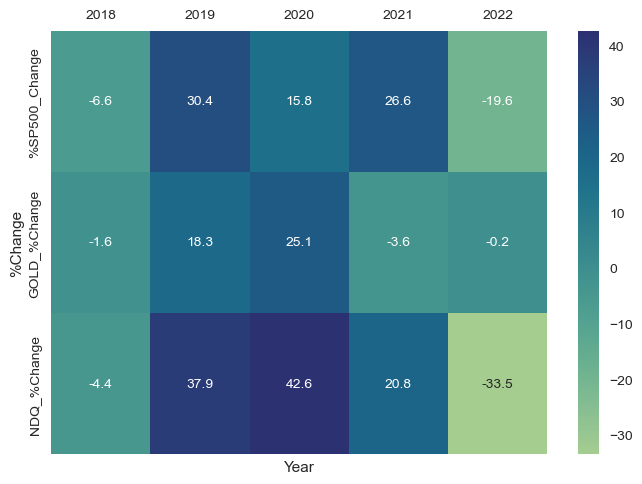

In [35]:
#Heatmap plot
ax = sns.heatmap(Change_rate,annot=True,fmt='.1f' ,cmap="crest")
ax.set(ylabel="%Change")
ax.xaxis.tick_top()

In [36]:
# Merge S&P500 and CPI&PPI
SP500_PPI = pd.merge( sp500, PPI, left_on='Date', right_on='PPI_DATE', how='inner' )
SP500_CPI = pd.merge( sp500, CPI, left_on='Date', right_on='CPI_DATE', how='inner' )


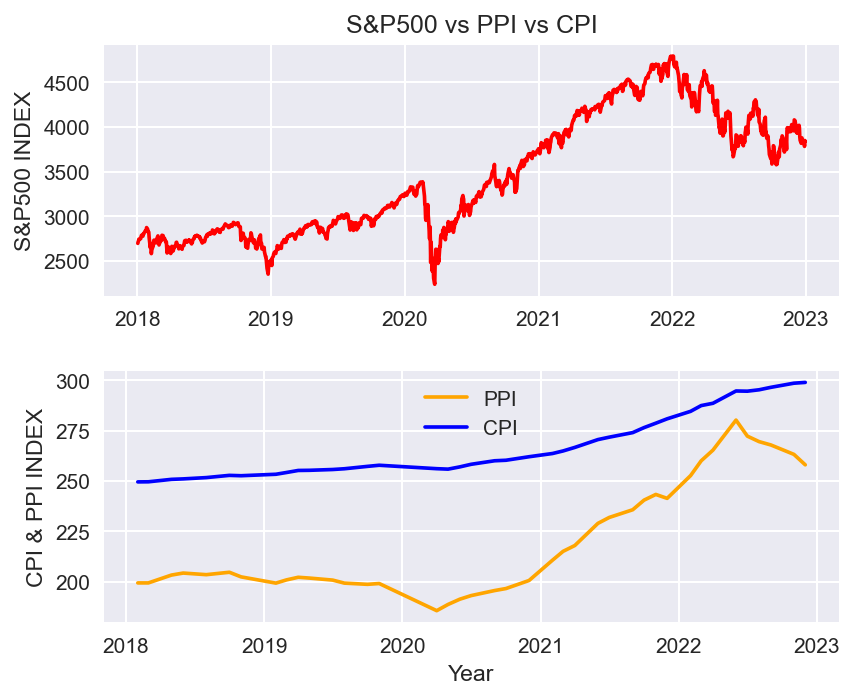

In [37]:
# plt.figure(figsize=(15,5),dpi=150)  # default: figsize=(6.4,4.8), dpi=100
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.figure(figsize=(10,5),dpi=150) 
# Line1: plot with the given x and y
# plt.subplot( grid[0, :2] );plt.title('PPI')
# plt.plot( SP500_PPI['Date'], SP500_PPI['PPIACO'], linestyle='solid' )  # Use keyword arguments   # Use string formatting
plt.subplot(grid[0, :2] );plt.title('S&P500 vs PPI vs CPI')
plt.ylabel('S&P500 INDEX')
plt.plot(sp500['Date'],sp500['sp500_Close'], linestyle='solid',color='red')
plt.subplot(grid[1, :2])
plt.plot(SP500_PPI['Date'],SP500_PPI['PPIACO'], linestyle='solid',color='orange',label = "PPI")
plt.plot(SP500_CPI['CPI_DATE'],SP500_CPI['CPIAUCSL'], linestyle='solid',color='blue',label = "CPI")
plt.ylabel('CPI & PPI INDEX')
plt.legend(loc='upper center')
plt.xlabel('Year')
plt.subplot(grid[1, :2])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [38]:
SP500_GDP = pd.merge( sp500, GDP, left_on='Date', right_on='GDP_DATE', how='left' )

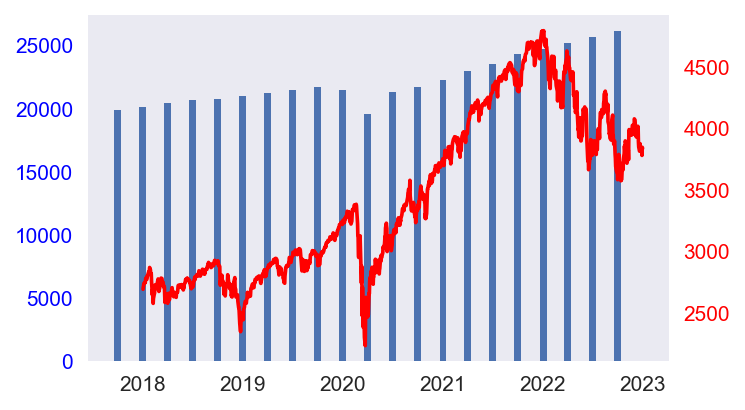

In [39]:
# plt.figure(figsize=(10,5),dpi=150)
# plt.bar( GDP['GDP_DATE'], GDP['GDP'], linestyle='solid',width = 25 )
# plt.plot(SP500_PPI['Date'],SP500_PPI['sp500_Close'], linestyle='solid',color='red')

fig, ax1 = plt.subplots(figsize=(5,3),dpi=150)
ax1.grid(False)
color = 'tab:green'
plt.bar( GDP['GDP_DATE'], GDP['GDP'], linestyle='solid',width = 25 )
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)
color = 'tab:blue'
plt.plot(sp500['Date'],sp500['sp500_Close'], linestyle='solid',color='red')
# plt.plot( SP500_DJI['Date'], SP500_DJI['CLOSE'], linestyle='solid' ,color='orange')
ax2.tick_params(axis='y', labelcolor='red')

In [40]:
Bondyield10Y
SP500_10Y = pd.merge( sp500, Bondyield10Y, left_on='Date', right_on='10Y_DATE', how='inner' )
Corr_10Y =SP500_10Y['sp500_Close'].corr(SP500_10Y['CLOSE']) ### Corelation between S&P500 & NASDAQ
SP500_FUNDFED = pd.merge( sp500, FEDFUND, left_on='Date', right_on='FED_DATE', how='inner' )


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


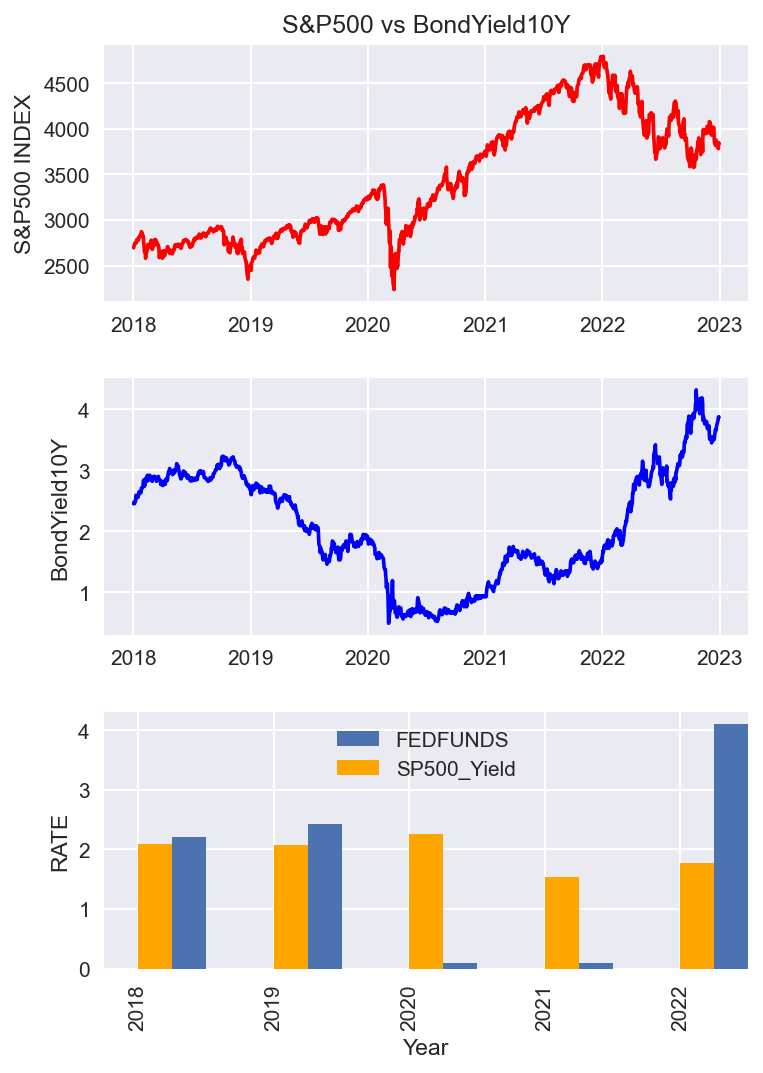

In [41]:
# plt.figure(figsize=(15,5),dpi=150)  # default: figsize=(6.4,4.8), dpi=100
grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)
plt.figure(figsize=(12,8),dpi=150) 
width = 0.25
n=5

plt.subplot(grid[0, :2] );plt.title('S&P500 vs BondYield10Y')
plt.ylabel('S&P500 INDEX')
plt.plot(sp500['Date'],sp500['sp500_Close'], linestyle='solid',color='red')
plt.subplot(grid[1, :2])
plt.plot(SP500_10Y['Date'],SP500_10Y['CLOSE'], linestyle='solid',color='blue')
plt.ylabel('BondYield10Y')
plt.legend(loc='upper center')
# plt.xlabel('Year')
plt.subplot(grid[2, :2]);
# plt.title('FED FUND RATE & S&P500 DEVIDEND YIELD ')
SP500_FUNDFED.groupby(SP500_FUNDFED.FED_DATE.dt.year)['FEDFUNDS'].max().plot(kind='bar', width = width, position=-1)
# SP500_10Y.groupby(SP500_10Y.Date.dt.year)['CLOSE'].mean().plot(kind='bar', width = width,color='purple', position=0)
SP500yield.groupby(SP500yield.SP500Yield_DATE.dt.year)['SP500_Yield'].max().mul(100).plot(kind='bar', width = width,color='orange', position=0)
plt.ylabel('RATE')
plt.legend(loc='upper center')
plt.xlabel('Year')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [42]:
SP500_FUNDFED.groupby(SP500_FUNDFED.FED_DATE.dt.year)['FEDFUNDS'].mean()

FED_DATE
2018    1.821429
2019    2.191250
2020    0.077143
2021    0.080000
2022    1.807778
Name: FEDFUNDS, dtype: float64

In [43]:
def max_drawdown(x):
    return ((x.max() - x)/(x.max())).max()


# ใช้ groupby และ apply เพื่อหา maximum drawdown ของแต่ละปี
max_drawdown_by_year = sp500.groupby(sp500.Date.dt.year)['sp500_Close'].apply(max_drawdown).to_frame().reset_index()
max_drawdown_by_year = max_drawdown_by_year.rename(columns={'sp500_Close': 'max_drawdown'})
max_drawdown_by_year = max_drawdown_by_year.round({'max_drawdown': 2})

# Set the figure size
plt.figure(figsize=(8,6))

# Convert the year column to integers
sp500['year'] = sp500.Date.dt.year.astype(int)
# max_drawdown_by_year['year'] = max_drawdown_by_year.Date.dt.year.astype(int)
# แสดงผลลัพธ์
print(max_drawdown_by_year)


   Date  max_drawdown
0  2018          0.20
1  2019          0.24
2  2020          0.40
3  2021          0.23
4  2022          0.25


<Figure size 800x600 with 0 Axes>

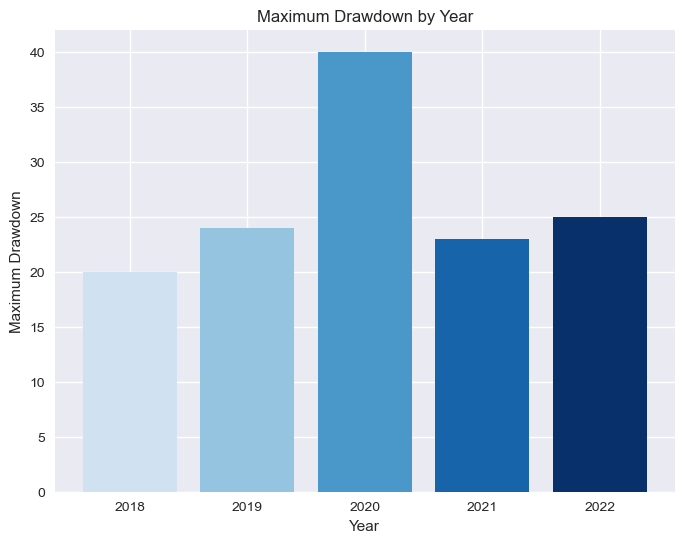

In [44]:
# กราฟ maximum drawdown แต่ละปี

# Define a blue gradient color map
blue_cmap = plt.get_cmap('Blues')

# Set the figure size
plt.figure(figsize=(8,6))

# Plot the maximum drawdown by year as a bar chart with a blue gradient
plt.bar(max_drawdown_by_year['Date'], max_drawdown_by_year['max_drawdown'].mul(100), 
        color=blue_cmap(np.linspace(0.2, 1.0, len(max_drawdown_by_year))))

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Maximum Drawdown')
plt.title('Maximum Drawdown by Year')

# Show the plot
plt.show()



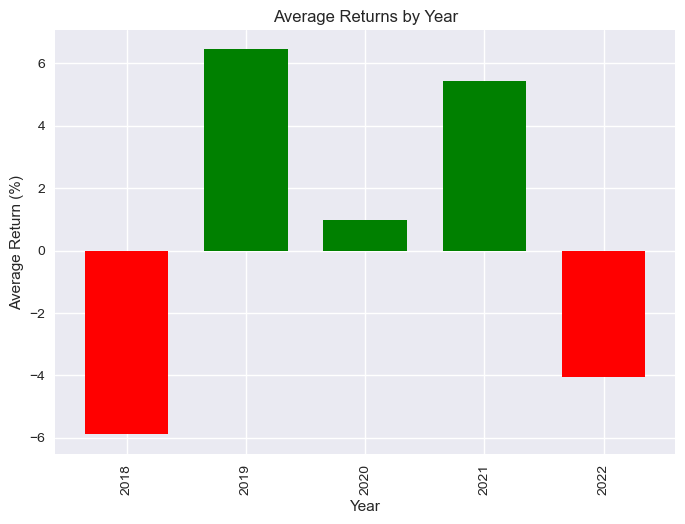

In [65]:

# Calculate the percentage return for each day
sp500['return'] = ((sp500['sp500_Close'] - sp500['Open']) / sp500['Open']) * 100

# Calculate the mean return for each year
mean_returns = sp500.groupby(sp500.Date.dt.year)['return'].mean().mul(100)

# Create a new column to specify the color of each bar
colors = ['red' if r < 0 else 'green' for r in mean_returns]
 
# Plot the bar chart
ax = mean_returns.plot(kind='bar', width=0.7, color=colors)

# Set the title and axis labels
ax.set_title('Average Returns by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Return (%)')

# Display the plot
plt.show()

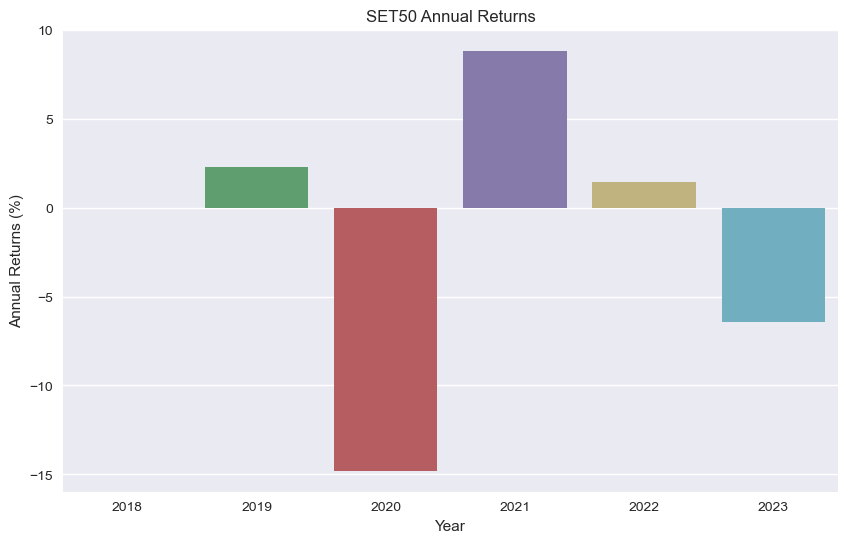

In [54]:
df = pd.read_csv(set50_url, parse_dates=['Date'], index_col='Date')

# คำนวณอัตราผลตอบแทนรายปี
yearly_returns = df['Close'].resample('Y').ffill().pct_change() * 100

# สร้างกราฟแสดงผลตอบแทนรายปี
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_returns.index.year, y=yearly_returns.values)
plt.xlabel('Year')
plt.ylabel('Annual Returns (%)')
plt.title('SET50 Annual Returns')
plt.show()

In [55]:
# Convert to float if necessary
if sp500_close['Close*'].dtype == object:
    sp500_close['Close*'] = sp500_close['Close*'].str.replace(',', '').astype(float)

if set50_close['Close'].dtype == object:
    set50_close['Close'] = set50_close['Close'].str.replace(',', '').astype(float)

# Convert date format
sp500_close['Date'] = pd.to_datetime(sp500_close['Date']).dt.strftime('%Y-%m-%d')
set50_close['Date'] = pd.to_datetime(set50_close['Date']).dt.strftime('%Y-%m-%d')

In [57]:
start_date = '2010-01-01'
end_date = '2022-12-31'

sp500_returns = pd.DataFrame()
sp500_returns['Year'] = pd.to_datetime(sp500_close['Date']).dt.year.unique()
sp500_returns['Return'] = [(sp500_close[sp500_close['Date'].str.startswith(str(year))]['Close*'].iloc[-1] - sp500_close[sp500_close['Date'].str.startswith(str(year))]['Close*'].iloc[0]) / sp500_close[sp500_close['Date'].str.startswith(str(year))]['Close*'].iloc[0] for year in sp500_returns['Year']]

set50_returns = pd.DataFrame()
set50_returns['Year'] = pd.to_datetime(set50_close['Date']).dt.year.unique()
set50_returns['Return'] = [(set50_close[set50_close['Date'].str.startswith(str(year))]['Close'].iloc[-1] - set50_close[set50_close['Date'].str.startswith(str(year))]['Close'].iloc[0]) / set50_close[set50_close['Date'].str.startswith(str(year))]['Close'].iloc[0] for year in set50_returns['Year']]

# Check data types
print(sp500_returns)
print(set50_returns)

   Year    Return
0  2022  0.249267
1  2021 -0.223561
2  2020 -0.132644
3  2019 -0.223089
4  2018  0.075377
   Year    Return
0  2023  0.055880
1  2022 -0.011888
2  2021 -0.074782
3  2020  0.118216
4  2019  0.026205
5  2018  0.135168


In [58]:
returns = sp500_returns.merge(set50_returns, on='Year', suffixes=('_SP500', '_SET50'))
returns = returns.set_index('Year')
returns = returns.round(2)
print(returns)

      Return_SP500  Return_SET50
Year                            
2022          0.25         -0.01
2021         -0.22         -0.07
2020         -0.13          0.12
2019         -0.22          0.03
2018          0.08          0.14


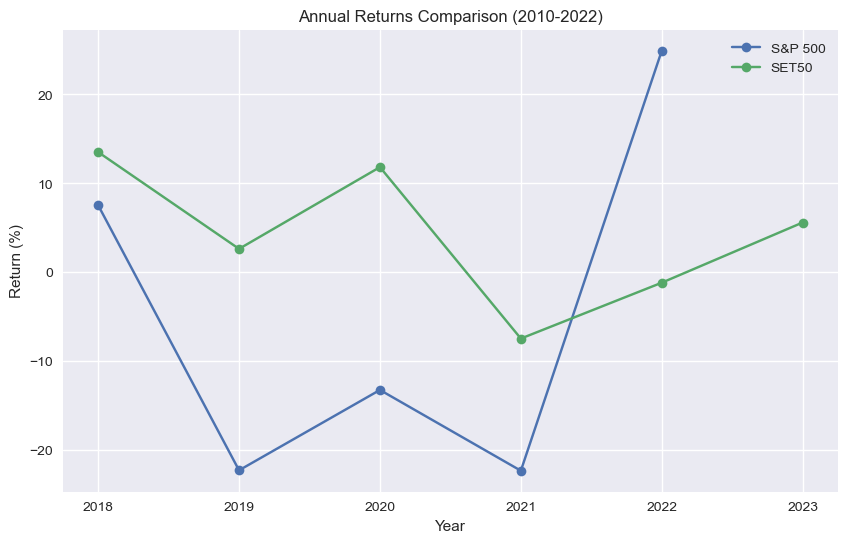

In [80]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot S&P 500 returns
plt.plot(sp500_returns['Year'], sp500_returns['Return'].mul(100), '-o')

# Plot SET50 returns
plt.plot(set50_returns['Year'], set50_returns['Return'].mul(100), '-o')

# Add title and axis labels
plt.title('Annual Returns Comparison (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Return (%)')

# Add legend
plt.legend(['S&P 500', 'SET50'])

# Show plot
plt.show()